# Data Project - Stock Market Analysis 

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo (deprecated)
# from pandas.io.data import DataReader

# new library to read stock data (new library)
#from pandas_datareader import data, wb

import pandas_datareader.data as web 

# For time stamps
from datetime import datetime

# For division
from __future__ import division

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
print end
print end.year
print end.month
print end.day

2017-05-05 14:44:54.582650
2017
5
5


In [3]:
# Getting data from a year from now
start = datetime(end.year - 3, end.month, end.day)
print start

2014-05-05 00:00:00


In [4]:
globals()

{'DataFrame': pandas.core.frame.DataFrame,
 'In': ['',
  u"#Let's go ahead and start with some imports\nimport pandas as pd\nfrom pandas import Series, DataFrame\nimport numpy as np\n\n# For Visualization\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nsns.set_style('whitegrid')\nget_ipython().magic(u'matplotlib inline')\n\n# For reading stock data from yahoo (deprecated)\n# from pandas.io.data import DataReader\n\n# new library to read stock data (new library)\n#from pandas_datareader import data, wb\n\nimport pandas_datareader.data as web \n\n# For time stamps\nfrom datetime import datetime\n\n# For division\nfrom __future__ import division",
  u"# The tech stocks we'll use for this analysis\ntech_list = ['AAPL','GOOG','MSFT','AMZN']\n\n# Set up End and Start times for data grab\nend = datetime.now()\nprint end\nprint end.year\nprint end.month\nprint end.day",
  u'# Getting data from a year from now\nstart = datetime(end.year - 3, end.month, end.day)\nprint start',
  u'globa

In [5]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple
global() is a dictionary having as keys our variables and values. Somve variables point to modules, objects,

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [6]:
AAPL.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2014-05-05  590.140022  600.999977  589.999992  600.959976  71766800   
2014-05-06  601.799995  604.409988  594.410027  594.410027  93641100   
2014-05-07  595.249992  597.289986  587.729980  592.329979  70716100   
2014-05-08  588.249992  594.410027  586.400017  587.990013  57574300   
2014-05-09  584.540001  586.250000  580.330025  585.540024  72899400   

            Adj Close  
Date                   
2014-05-05  81.006831  
2014-05-06  80.123926  
2014-05-07  79.843544  
2014-05-08  79.701223  
2014-05-09  79.369131

In [7]:
GOOG.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2014-05-05  524.822381  528.902418  521.322364  527.812392  1024100   
2014-05-06  525.232379  526.812396  515.062337  515.142330  1689000   
2014-05-07  515.792305  516.682320  503.302272  509.962321  3224300   
2014-05-08  508.462297  517.232351  506.452298  511.002313  2021300   
2014-05-09  510.752299  519.902332  504.202292  518.732375  2439400   

             Adj Close  
Date                    
2014-05-05  527.812392  
2014-05-06  515.142330  
2014-05-07  509.962321  
2014-05-08  511.002313  
2014-05-09  518.732375

In [8]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close        Volume  \
count  757.000000  757.000000  757.000000  757.000000  7.570000e+02   
mean   128.691981  129.787147  127.653038  128.777926  4.523272e+07   
std     88.222120   88.977577   87.838782   88.564299  2.159875e+07   
min     90.000000   90.699997   89.470001   90.279999  1.147590e+07   
25%    101.519997  102.349998  100.589996  101.540001  3.026890e+07   
50%    112.260002  113.330002  111.330002  112.400002  4.062140e+07   
75%    124.769997  125.739998  123.379997  124.529999  5.484360e+07   
max    649.900002  651.259979  644.470024  647.349983  1.898463e+08   

        Adj Close  
count  757.000000  
mean   109.242533  
std     14.475182  
min     79.369131  
25%     96.938894  
50%    108.638987  
75%    118.735214  
max    147.509995

In [9]:
GOOG.describe()

Open        High         Low       Close        Volume  \
count  757.000000  757.000000  757.000000  757.000000  7.570000e+02   
mean   664.749735  669.796292  659.212762  664.735735  1.848546e+06   
std    108.783366  109.228067  108.640681  108.979500  9.260871e+05   
min    494.652237  495.978230  487.562205  492.552239  5.272000e+05   
25%    553.512513  556.852545  548.132463  553.932488  1.301300e+06   
50%    683.000000  692.320007  673.450012  683.109985  1.629200e+06   
75%    762.419983  768.950012  754.830017  762.130005  2.090600e+06   
max    926.070007  935.929993  924.590027  931.659973  1.116490e+07   

        Adj Close  
count  757.000000  
mean   664.735735  
std    108.979500  
min    492.552239  
25%    553.932488  
50%    683.109985  
75%    762.130005  
max    931.659973

In [10]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2014-05-05 to 2017-05-04
Data columns (total 6 columns):
Open         757 non-null float64
High         757 non-null float64
Low          757 non-null float64
Close        757 non-null float64
Volume       757 non-null int64
Adj Close    757 non-null float64
dtypes: float64(5), int64(1)
memory usage: 41.4 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

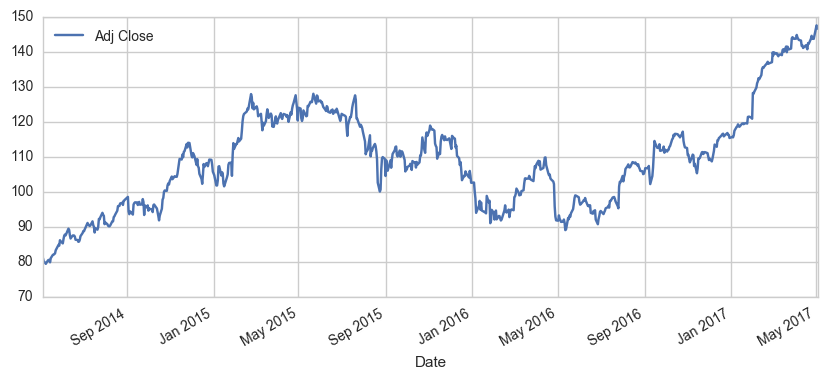

In [11]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

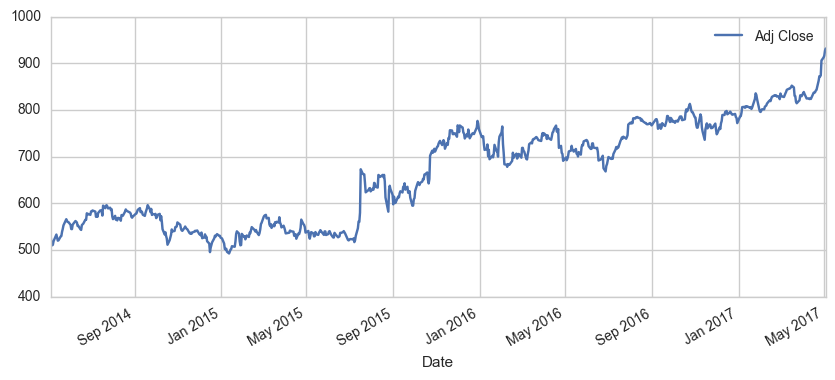

In [12]:
GOOG['Adj Close'].plot(legend=True, figsize=(10,4))

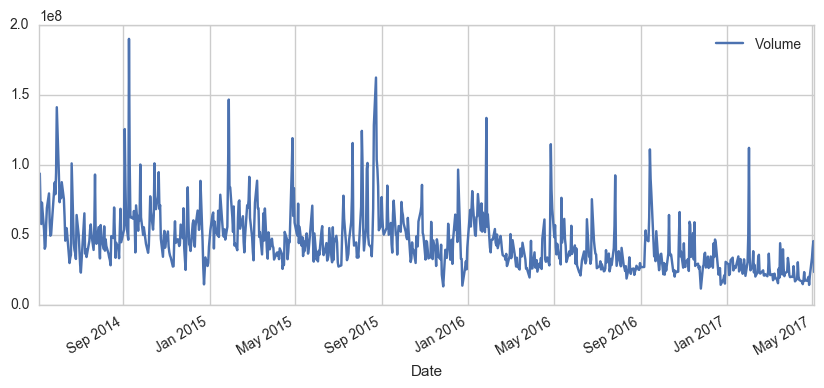

In [13]:
# Now let's plot the total volume of stock being traded each day over the past 3 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

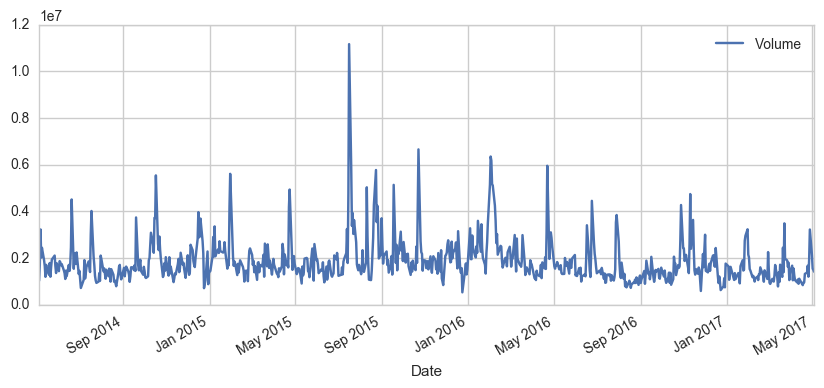

In [14]:
GOOG['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [15]:
## DO NOT RUN THIS CELL
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] =pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/starignus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/starignus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/starignus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [16]:
# The loop from above has been implemented in a function to implemented in any
# stock we want to study. Here it was used rolling_mean that soon will be deprecated.
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html
def ma_cal_one(days, tech_comp):
    for ma in days:
        column_name = "MA for %s days" %(str(ma))
        tech_comp[column_name] = pd.rolling_mean(tech_comp['Adj Close'], ma)

In [17]:
# The pd.rolling_mean is going to be deprecated, so we implemente the new way 
# tht is applied to a panda Series http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
def ma_cal_two(days, tech_comp):
    for ma in days:
        column_name = "MA for %s days" %(str(ma))
        tech_comp[column_name] = tech_comp['Adj Close'].rolling(ma).mean()

In [18]:
ma_day = [10, 20, 50]
# APPL
ma_cal_two(ma_day, AAPL)
# Google
ma_cal_one(ma_day, GOOG)

/Users/starignus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/starignus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/starignus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [19]:
AAPL.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2014-05-05  590.140022  600.999977  589.999992  600.959976  71766800   
2014-05-06  601.799995  604.409988  594.410027  594.410027  93641100   
2014-05-07  595.249992  597.289986  587.729980  592.329979  70716100   
2014-05-08  588.249992  594.410027  586.400017  587.990013  57574300   
2014-05-09  584.540001  586.250000  580.330025  585.540024  72899400   

            Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                                   
2014-05-05  81.006831             NaN             NaN             NaN  
2014-05-06  80.123926             NaN             NaN             NaN  
2014-05-07  79.843544             NaN             NaN             NaN  
2014-05-08  79.701223             NaN             NaN             NaN  
2014-05-09  79.369131             NaN             NaN             NaN

In [20]:
GOOG.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2014-05-05  524.822381  528.902418  521.322364  527.812392  1024100   
2014-05-06  525.232379  526.812396  515.062337  515.142330  1689000   
2014-05-07  515.792305  516.682320  503.302272  509.962321  3224300   
2014-05-08  508.462297  517.232351  506.452298  511.002313  2021300   
2014-05-09  510.752299  519.902332  504.202292  518.732375  2439400   

             Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                                    
2014-05-05  527.812392             NaN             NaN             NaN  
2014-05-06  515.142330             NaN             NaN             NaN  
2014-05-07  509.962321             NaN             NaN             NaN  
2014-05-08  511.002313             NaN             NaN             NaN  
2014-05-09  518.732375             NaN             NaN             NaN

Now let's go ahead and plot all the additional Moving Averages. **Note**: Another strategy is to apply two moving averages to a chart, one longer and one shorter. When the shorter MA crosses above the longer term MA it's a buy signal as it indicates the trend is shifting up.This is known as a **golden cross**.

When the shorter MA crosses below the longer term MA it's a sell signal as it indicates the trend is shifting down. This is known as a **dead/death cross**.


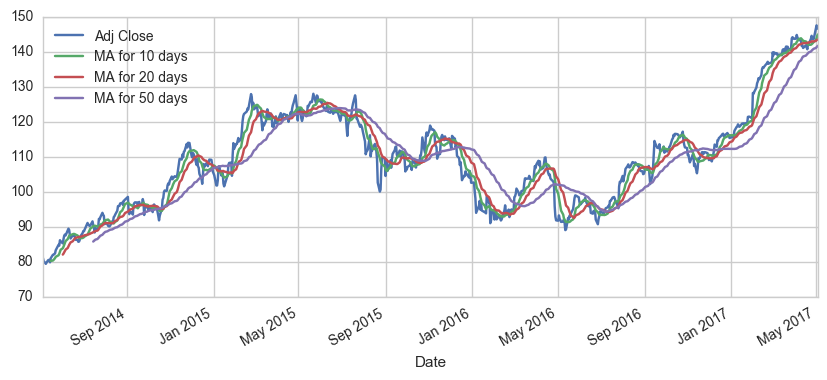

In [21]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

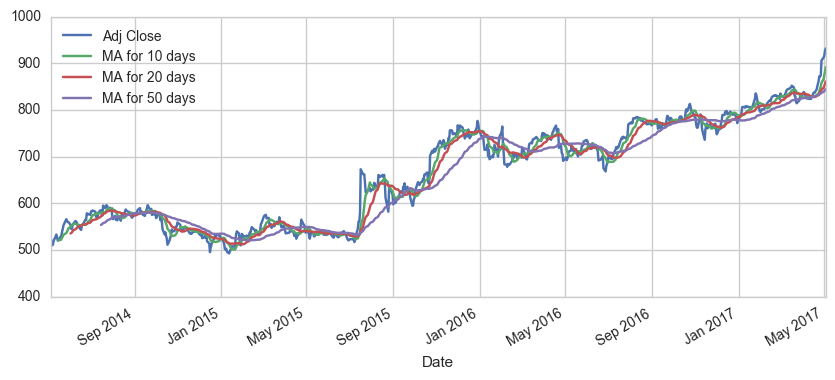

In [22]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

#### Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

In [ ]:
# We'll use pct_change to find the percent change for each day (change in the row value nextday.value/previusday.value -1)
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [23]:
# Making a function
def daily_return(tech_comp):
    tech_comp['Daily Return'] = tech_comp['Adj Close'].pct_change()
    # Then we'll plot the daily return percentage
    tech_comp['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

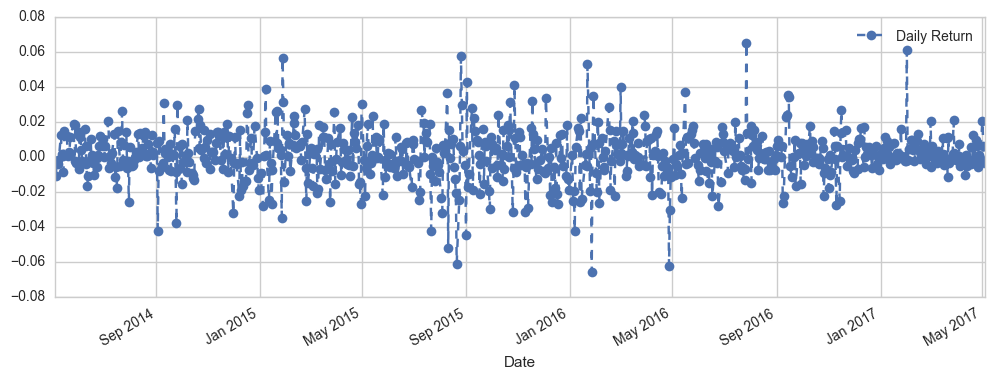

In [24]:
daily_return(AAPL)

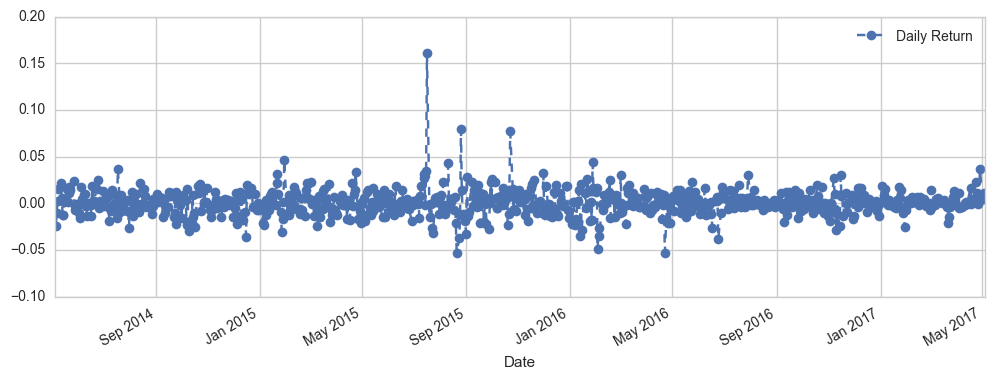

In [25]:
daily_return(GOOG)

In [26]:
AAPL.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2014-05-05  590.140022  600.999977  589.999992  600.959976  71766800   
2014-05-06  601.799995  604.409988  594.410027  594.410027  93641100   
2014-05-07  595.249992  597.289986  587.729980  592.329979  70716100   
2014-05-08  588.249992  594.410027  586.400017  587.990013  57574300   
2014-05-09  584.540001  586.250000  580.330025  585.540024  72899400   

            Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                    
2014-05-05  81.006831             NaN             NaN             NaN   
2014-05-06  80.123926             NaN             NaN             NaN   
2014-05-07  79.843544             NaN             NaN             NaN   
2014-05-08  79.701223             NaN             NaN             NaN   
2014-05-09  79.369131             NaN             NaN             NaN   

            Daily Return  
Date                      
2014-05-05           NaN  
2014-05-06     -0.010899  
2014-05-07     -0.003499  
2014-05-08     -0.001782  
2014-05-09     -0.004167

In [27]:
GOOG.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2014-05-05  524.822381  528.902418  521.322364  527.812392  1024100   
2014-05-06  525.232379  526.812396  515.062337  515.142330  1689000   
2014-05-07  515.792305  516.682320  503.302272  509.962321  3224300   
2014-05-08  508.462297  517.232351  506.452298  511.002313  2021300   
2014-05-09  510.752299  519.902332  504.202292  518.732375  2439400   

             Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                     
2014-05-05  527.812392             NaN             NaN             NaN   
2014-05-06  515.142330             NaN             NaN             NaN   
2014-05-07  509.962321             NaN             NaN             NaN   
2014-05-08  511.002313             NaN             NaN             NaN   
2014-05-09  518.732375             NaN             NaN             NaN   

            Daily Return  
Date                      
2014-05-05           NaN  
2014-05-06     -0.024005  
2014-05-07     -0.010055  
2014-05-08      0.002039  
2014-05-09      0.015127

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

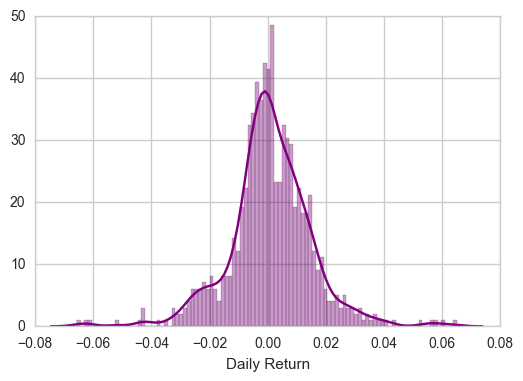

In [28]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

In [29]:
def dist_daily_return_sns(tech_comp):
    # Id KDE is plotted, the histogram height shows a density rather than a count
    sns.distplot(tech_comp['Daily Return'].dropna(), bins=100, color='purple')

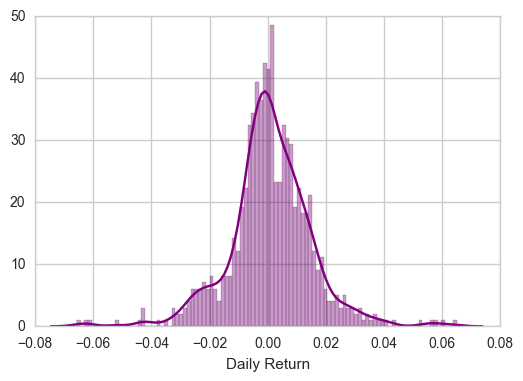

In [30]:
dist_daily_return_sns(AAPL)

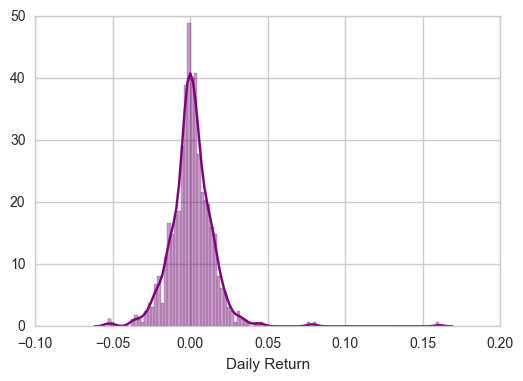

In [31]:
dist_daily_return_sns(GOOG)

In [32]:
# Normed menas that the area of all the bins sums up 1
def distr_daily_return_mpl(tech_comp):
    tech_comp['Daily Return'].hist(bins=100, color='purple', normed=1)

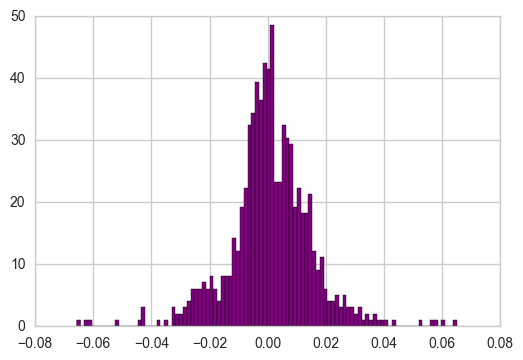

In [33]:
distr_daily_return_mpl(AAPL)

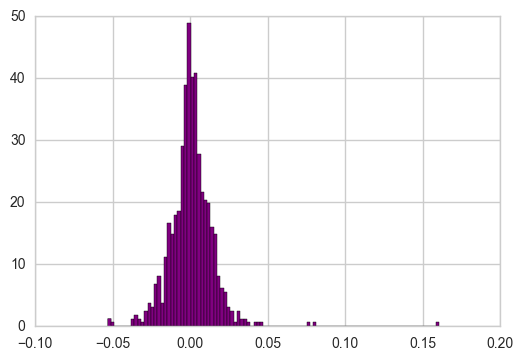

In [34]:
distr_daily_return_mpl(GOOG)

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [35]:
# Grab all the closing prices for the tech stock list into one DataFrame (we just specify the column that we wanted)
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'], 'yahoo', start, end)['Adj Close']

In [36]:
# Let's take a quick look
closing_df.head()

AAPL        AMZN        GOOG       MSFT
Date                                                    
2014-05-05  81.006831  310.049988  527.812392  36.416021
2014-05-06  80.123926  297.380005  515.142330  36.074305
2014-05-07  79.843544  292.709991  509.962321  36.406784
2014-05-08  79.701223  288.320007  511.002313  36.609968
2014-05-09  79.369131  292.239990  518.732375  36.517614

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [37]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [38]:
tech_rets.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2014-05-05       NaN       NaN       NaN       NaN
2014-05-06 -0.010899 -0.040864 -0.024005 -0.009384
2014-05-07 -0.003499 -0.015704 -0.010055  0.009217
2014-05-08 -0.001782 -0.014998  0.002039  0.005581
2014-05-09 -0.004167  0.013596  0.015127 -0.002523

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

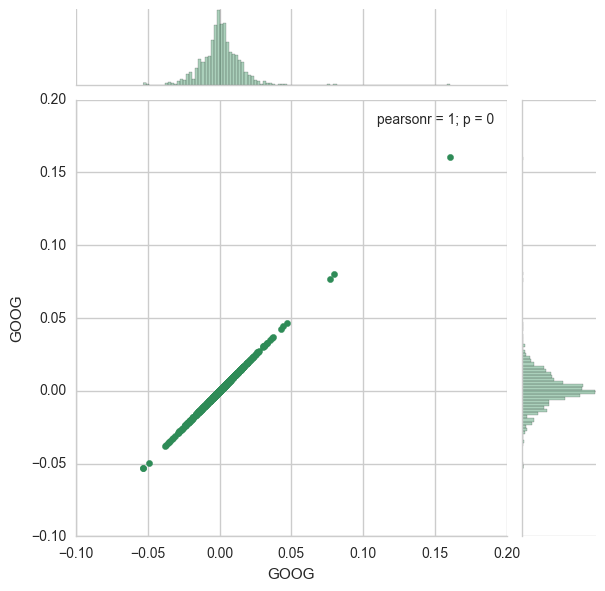

In [39]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG', tech_rets, kind='scatter', color='seagreen', marginal_kws={'bins':100, 'rug':False})

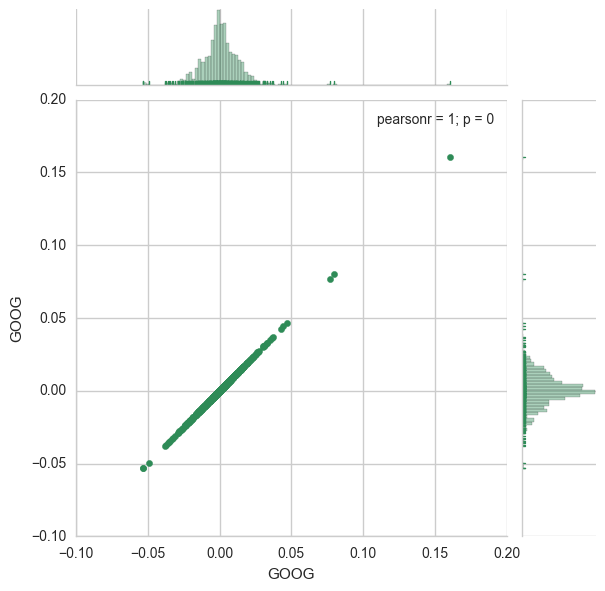

In [68]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG', tech_rets, kind='scatter', color='seagreen', marginal_kws={'bins':100, 'rug':True})

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

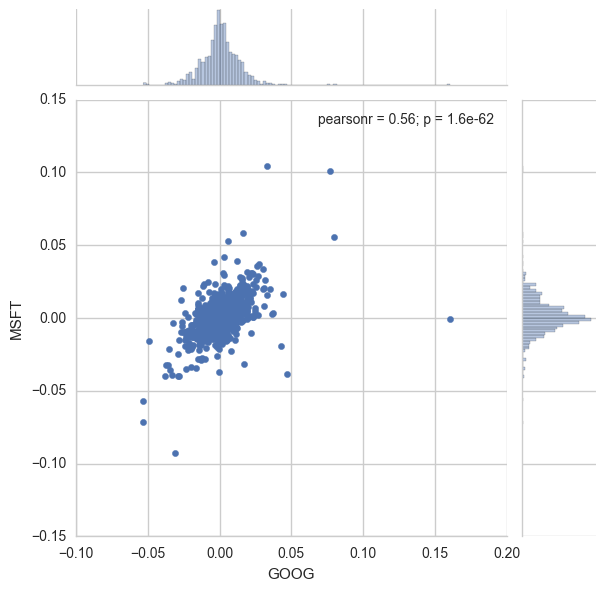

In [32]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter', marginal_kws={'bins':100})

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

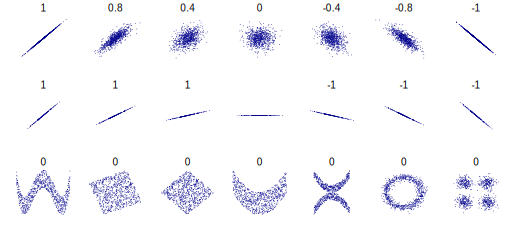

In [70]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

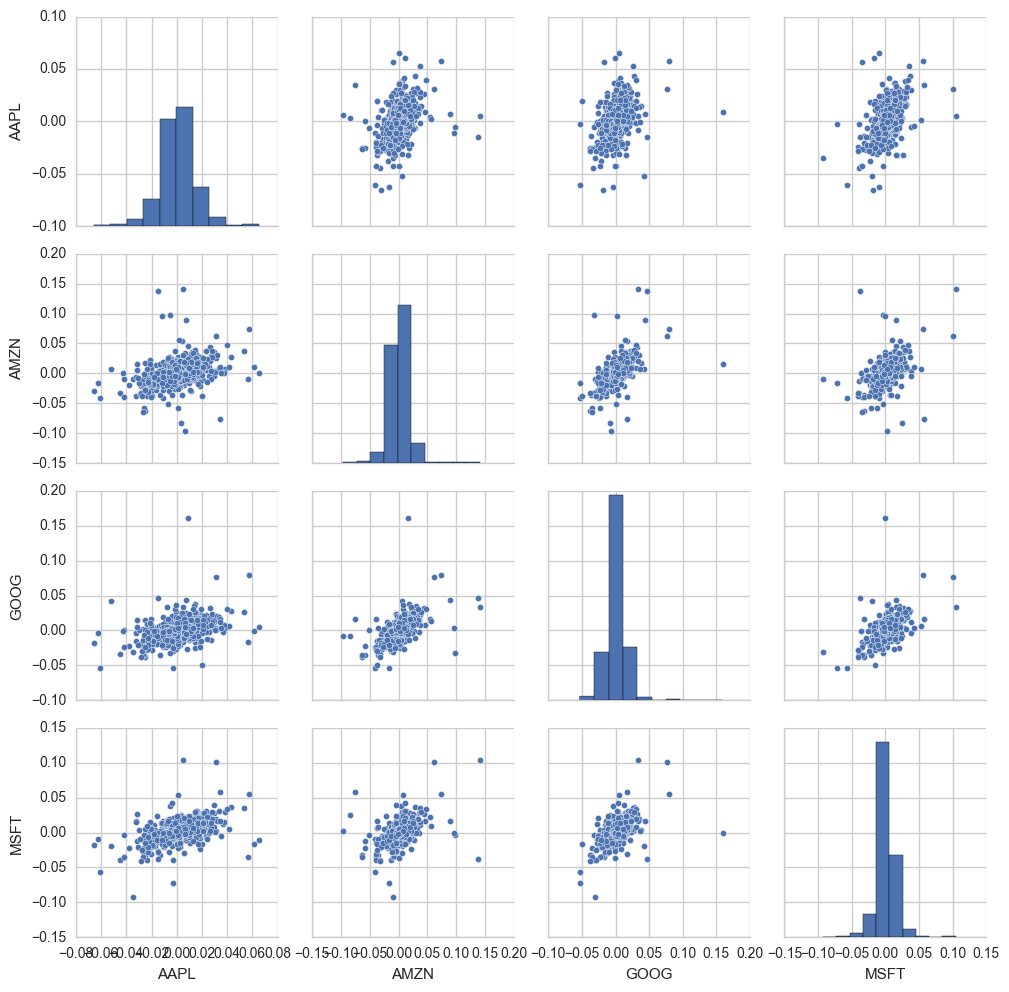

In [71]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
# http://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result. https://matplotlib.org/examples/color/colormaps_reference.html

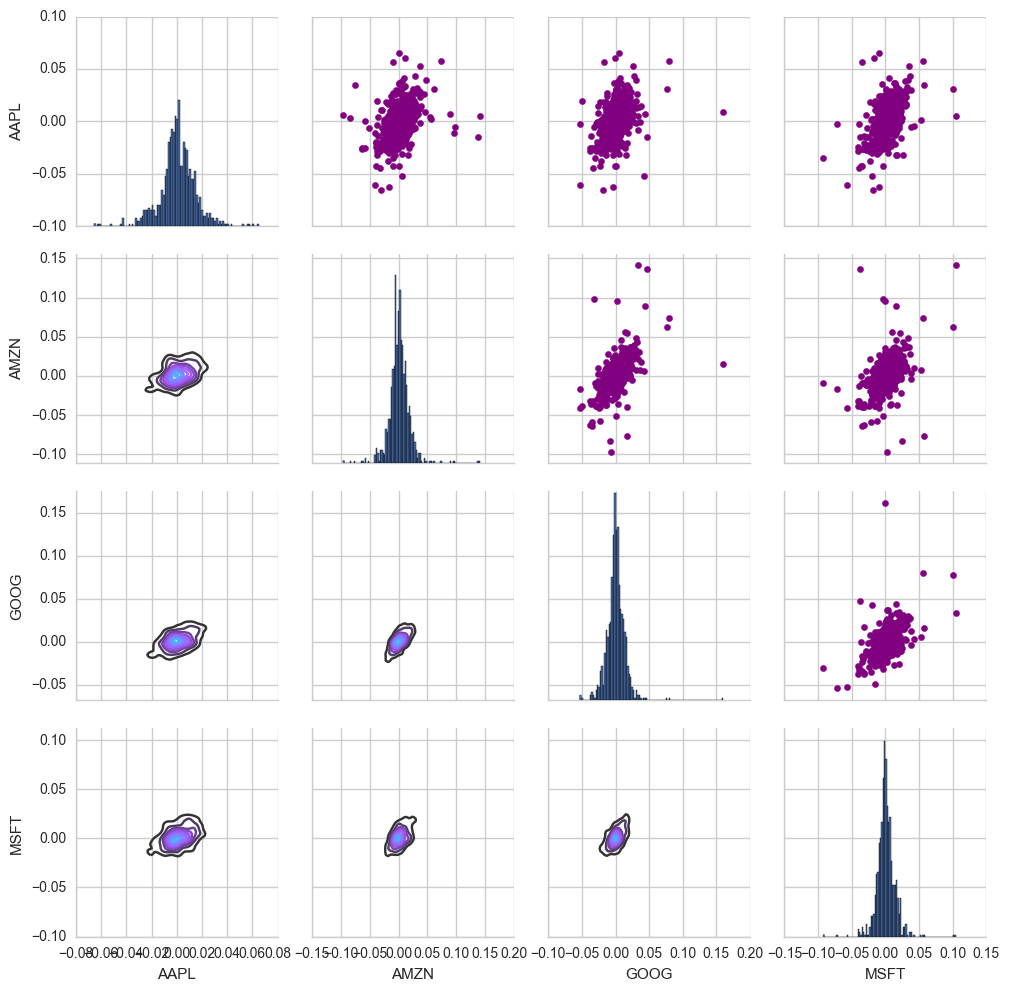

In [72]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig = returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig = returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig = returns_fig.map_diag(plt.hist, bins=100)

In [127]:
# Function to pass to each plot to get the correlation and the p-value
# http://stackoverflow.com/questions/34255242/seaborn-pairplot-pearsons-p-statistic
import scipy.stats as sps

def corrfunc(x, y, **kws):
    (r, p) = sps.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

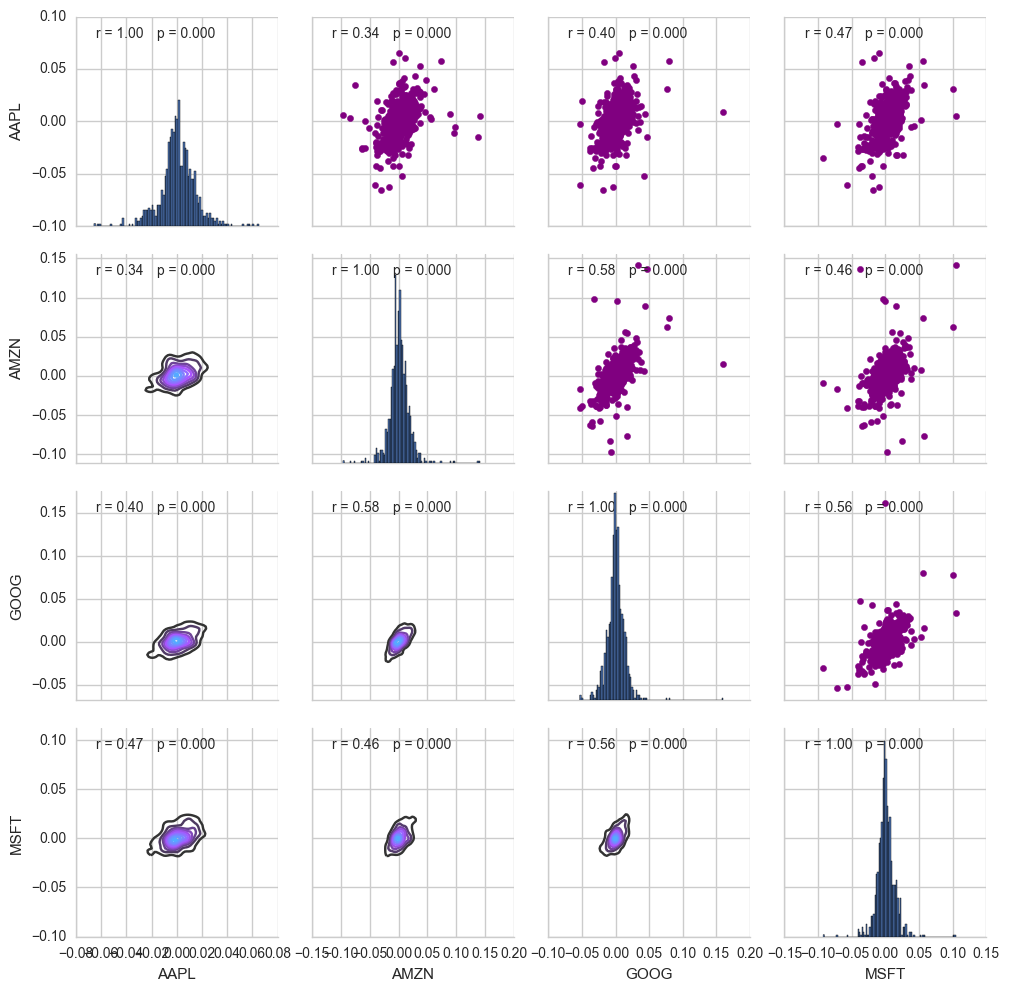

In [128]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig = returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig = returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig = returns_fig.map_diag(plt.hist, bins=100)
returns_fig = returns_fig.map(corrfunc)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

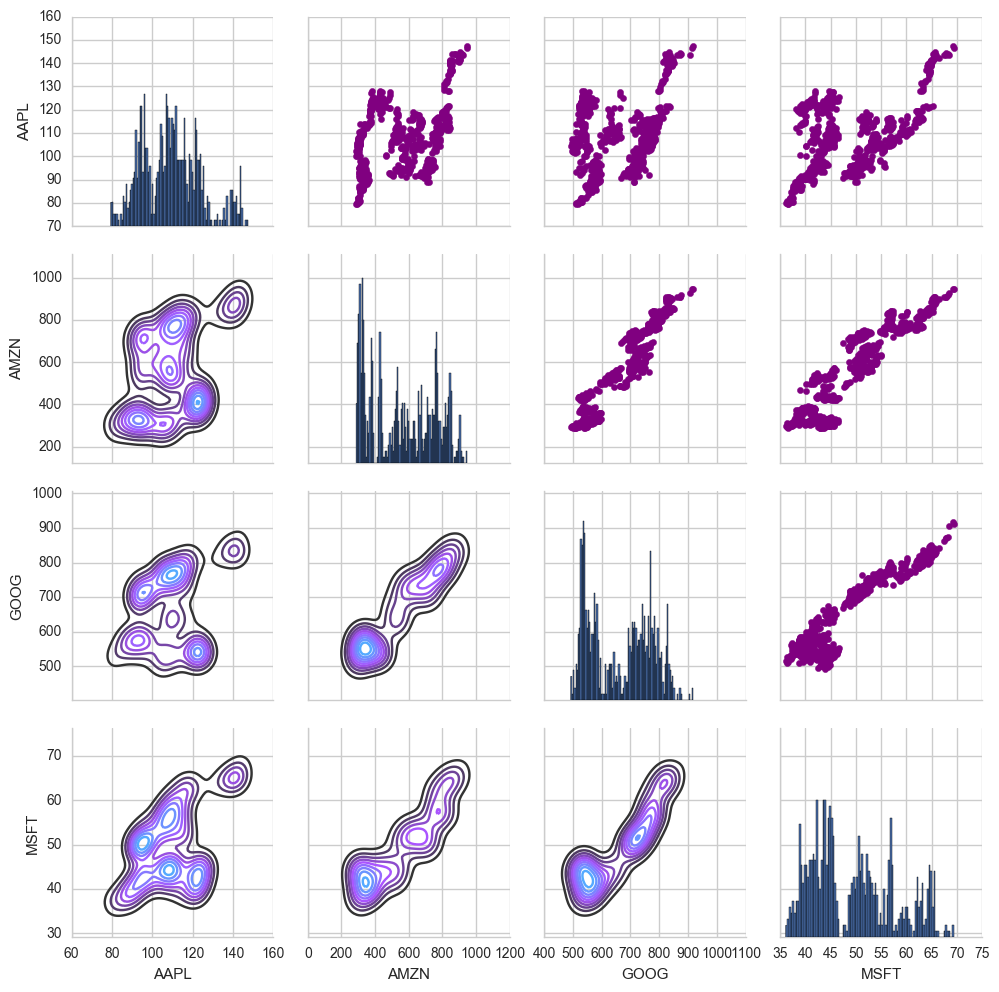

In [73]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=100)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

In [40]:
corr_matx = tech_rets.dropna().corr()

In [34]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns (Deprecated)
sns.corrplot(tech_rets.dropna(), annot=True)

AttributeError: 'module' object has no attribute 'corrplot'

In [41]:
# Calculating correlation matrix
corr_matx

AAPL      AMZN      GOOG      MSFT
AAPL  1.000000  0.344646  0.400961  0.466779
AMZN  0.344646  1.000000  0.578680  0.455419
GOOG  0.400961  0.578680  1.000000  0.555870
MSFT  0.466779  0.455419  0.555870  1.000000

In [36]:
# setup colour plates for cmap http://seaborn.pydata.org/tutorial/color_palettes.html
# more palettes https://matplotlib.org/examples/color/colormaps_reference.html 
current_palte_1 =  sns.diverging_palette(220, 20, n=7, as_cmap=True)
current_palte_2 = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True,as_cmap=True)
current_palte_3 = sns.diverging_palette(220, 20, n=7, as_cmap=True)
current_palte_4 = "Set2"
current_palte_5 = 'jet'


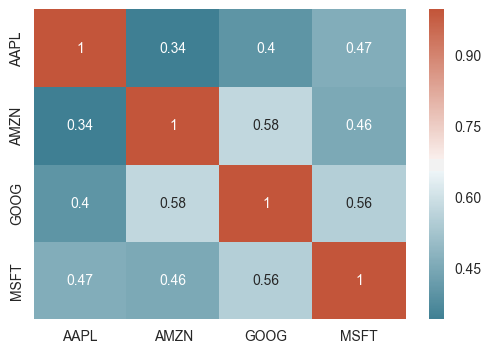

In [120]:
sns.heatmap(corr_matx, annot=True, cmap=current_palte_1)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated. (This was seen in the data of tutorual, which was covering until 2015). Our observations changes, and we can see that Amazon and Apple had the less stronger correlation (We can see that aoole is the one with weaker correlation to the other companies), but Amazon and Google, Microsoft and google have the stronger correlation. 

In [42]:
# Lets analyse the closing price
corr_matx_closing = closing_df.dropna().corr()
corr_matx_closing

AAPL      AMZN      GOOG      MSFT
AAPL  1.000000  0.429636  0.332388  0.507397
AMZN  0.429636  1.000000  0.954137  0.920042
GOOG  0.332388  0.954137  1.000000  0.928071
MSFT  0.507397  0.920042  0.928071  1.000000

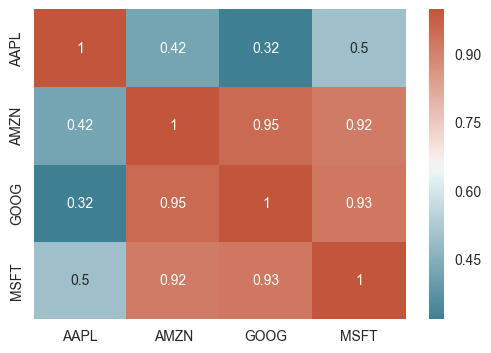

In [125]:
sns.heatmap(corr_matx_closing, annot=True, cmap=current_palte_1)

In the case of the closing prices, we can see the same strong correlation between the same companies. 

Note for plotting pearson and p along the plots: http://stackoverflow.com/questions/35914568/how-to-set-personalized-legends-for-each-variable-in-a-seaborn-pairplot

http://stackoverflow.com/questions/34255242/seaborn-pairplot-pearsons-p-statistic

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the **standard deviation of the daily returns** (this is the Risk).

In [43]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()
rets.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2014-05-06 -0.010899 -0.040864 -0.024005 -0.009384
2014-05-07 -0.003499 -0.015704 -0.010055  0.009217
2014-05-08 -0.001782 -0.014998  0.002039  0.005581
2014-05-09 -0.004167  0.013596  0.015127 -0.002523
2014-05-12  0.012450  0.036340  0.021572  0.010875

In [44]:
# Defining the area of the cicles of the scatter plot
area = np.pi * 20

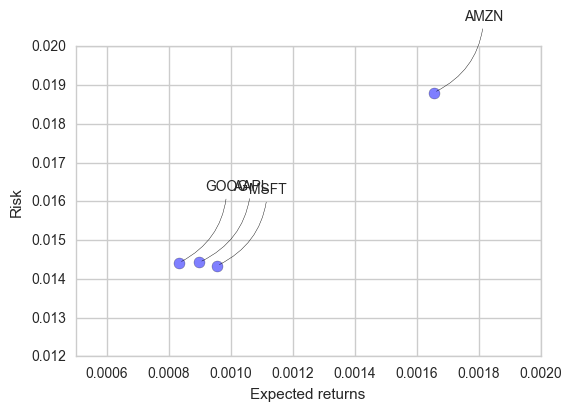

In [144]:
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.012,0.020])
plt.xlim([0.0005,0.0020])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


For the plot above, we want to get a more postive daily return, and a lower risk (less standard deviation). We do not want negative returns and high std (risk). You are in a little trobulesome, if your daily retun is high and your std is too, you are jut playing the stockmarket.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

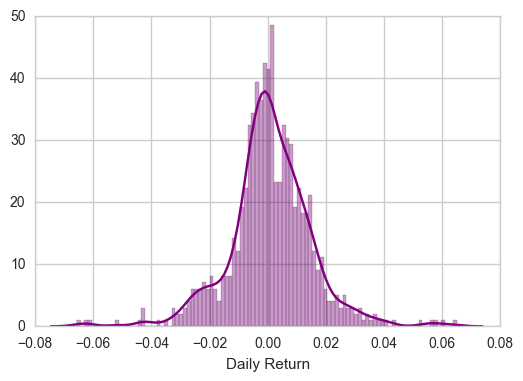

In [45]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

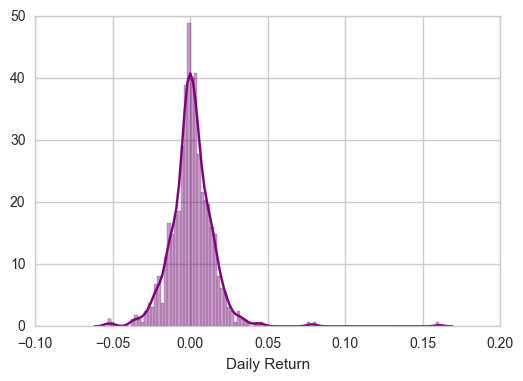

In [46]:
sns.distplot(GOOG['Daily Return'].dropna(), bins=100, color='purple')

In [149]:
rets.head()

AAPL      AMZN      GOOG      MSFT
Date                                              
2014-05-06 -0.010899 -0.040864 -0.024005 -0.009384
2014-05-07 -0.003499 -0.015704 -0.010055  0.009217
2014-05-08 -0.001782 -0.014998  0.002039  0.005581
2014-05-09 -0.004167  0.013596  0.015127 -0.002523
2014-05-12  0.012450  0.036340  0.021572  0.010875

Now we can use quantile to get the risk value for the stock.

In [146]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.023002371229114655

In [148]:
# The 0.05 empirical quantile of daily returns
rets['GOOG'].quantile(0.05)

-0.020898419014617108

In [150]:
# The 0.05 empirical quantile of daily returns
rets['AMZN'].quantile(0.05)

-0.022906920690624458

In [151]:
# The 0.05 empirical quantile of daily returns
rets['MSFT'].quantile(0.05)

-0.01884178358738169

The 0.05 empirical quantile of daily returns (remember that this is the percentage of change from one day to another) is at -0.023 for Apple. That means that with 95% confidence, our worst daily loss will not exceed 2.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.020 * 1,000,000 = $20,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier and is the mean),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp
For random walk in physics: http://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm


To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [47]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [48]:
print dt
print mu
print sigma

0.0027397260274
0.00085361671114
0.0144015893844


Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form out daily returns

In [49]:
def stock_monte_carlo(start_price, days, mu ,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array with the same number of days
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price (prince[x] = price[x-1] + Delta S)
        price[x] = price[x - 1] + (price[x-1] * (drift[x] + shock[x]))        
    return price

Grate now let's put our function to work!

In [43]:
GOOG.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2014-05-05  524.822381  528.902418  521.322364  527.812392  1024100   
2014-05-06  525.232379  526.812396  515.062337  515.142330  1689000   
2014-05-07  515.792305  516.682320  503.302272  509.962321  3224300   
2014-05-08  508.462297  517.232351  506.452298  511.002313  2021300   
2014-05-09  510.752299  519.902332  504.202292  518.732375  2439400   

             Adj Close  Daily Return  
Date                                  
2014-05-05  527.812392           NaN  
2014-05-06  515.142330     -0.024005  
2014-05-07  509.962321     -0.010055  
2014-05-08  511.002313      0.002039  
2014-05-09  518.732375      0.015127

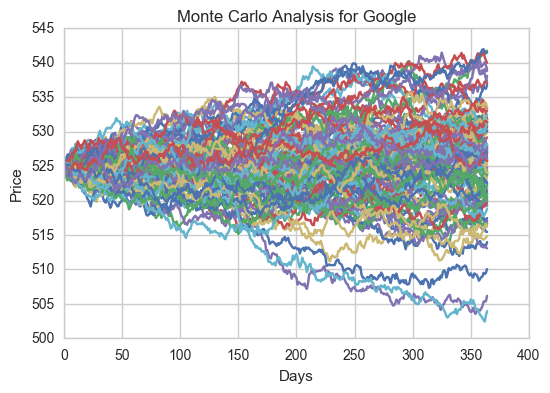

In [50]:
# Get start price from GOOG.head()
start_price = 524.82

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [51]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link:
http://en.wikipedia.org/wiki/Quantile

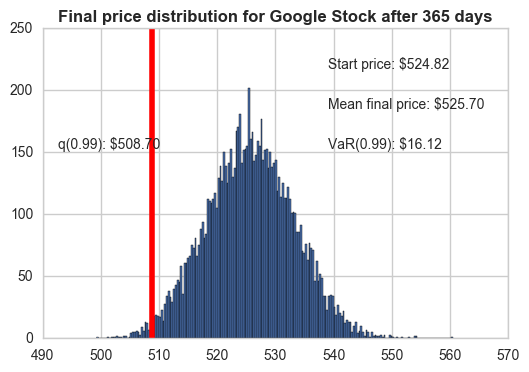

In [52]:
# Now we'll define q as the 1% empirical qunatile, this basically means that 99% of 
# the values should fit whithin our output 
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $16.12 for every investment of 524.82 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $16.12 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.

# Great job!

Open        High         Low       Close     Volume  \
Date                                                                    
2014-05-05  590.140022  600.999977  589.999992  600.959976   71766800   
2014-05-06  601.799995  604.409988  594.410027  594.410027   93641100   
2014-05-07  595.249992  597.289986  587.729980  592.329979   70716100   
2014-05-08  588.249992  594.410027  586.400017  587.990013   57574300   
2014-05-09  584.540001  586.250000  580.330025  585.540024   72899400   
2014-05-12  587.489975  593.659996  587.399986  592.830017   53302200   
2014-05-13  591.999985  594.540016  590.699982  593.760025   39934300   
2014-05-14  592.430008  597.400002  591.740005  593.869987   41601000   
2014-05-15  594.700020  596.599983  588.040001  588.819992   57711500   
2014-05-16  588.629974  597.529991  585.399994  597.510017   69064100   
2014-05-19  597.849998  607.330002  597.329987  604.590019   79438800   
2014-05-20  604.510017  606.399994  600.730011  604.710022   58709000   
2014-05-21  603.830002  606.699974  602.059975  606.310005   49214900   
2014-05-22  606.599998  609.850006  604.100021  607.269974   50190000   
2014-05-23  607.250000  614.730011  606.470009  614.129997   58052400   
2014-05-27  615.879997  625.859985  615.630005  625.630020   87216500   
2014-05-28  626.019989  629.830009  623.779991  624.010010   78870400   
2014-05-29  627.849991  636.870010  627.769989  635.379990   94118500   
2014-05-30  637.979996  644.169991  628.900002  633.000015  141005200   
2014-06-02  633.959984  634.830017  622.500015  628.650009   92337700   
2014-06-03  628.459991  638.740013  628.250000  637.539986   73177300   
2014-06-04  637.440010  647.890022  636.109993  644.819992   83870500   
2014-06-05  646.199997  649.370003  642.610008  647.349983   75951400   
2014-06-06  649.900002  651.259979  644.470024  645.570023   87484600   
2014-06-09   92.699997   93.879997   91.750000   93.699997   75415000   
2014-06-10   94.730003   95.050003   93.570000   94.250000   62777000   
2014-06-11   94.129997   94.760002   93.470001   93.860001   45681000   
2014-06-12   94.040001   94.120003   91.900002   92.290001   54749000   
2014-06-13   92.199997   92.440002   90.879997   91.279999   54525000   
2014-06-16   91.510002   92.750000   91.449997   92.199997   35561000   
...                ...         ...         ...         ...        ...   
2017-03-23  141.259995  141.580002  140.610001  140.919998   20346300   
2017-03-24  141.500000  141.740005  140.350006  140.639999   22395600   
2017-03-27  139.389999  141.220001  138.619995  140.880005   23575100   
2017-03-28  140.910004  144.039993  140.619995  143.800003   33374800   
2017-03-29  143.679993  144.490005  143.190002  144.119995   29190000   
2017-03-30  144.190002  144.500000  143.500000  143.929993   21207300   
2017-03-31  143.720001  144.270004  143.009995  143.660004   19661700   
2017-04-03  143.710007  144.119995  143.050003  143.699997   19985700   
2017-04-04  143.250000  144.889999  143.169998  144.770004   19765700   
2017-04-05  144.220001  145.460007  143.809998  144.020004   27481500   
2017-04-06  144.289993  144.520004  143.449997  143.660004   21118000   
2017-04-07  143.729996  144.179993  143.270004  143.339996   16621300   
2017-04-10  143.600006  143.880005  142.899994  143.169998   18473000   
2017-04-11  142.940002  143.350006  140.059998  141.630005   30275300   
2017-04-12  141.600006  142.149994  141.009995  141.800003   20238900   
2017-04-13  141.910004  142.380005  141.050003  141.050003   17652900   
2017-04-17  141.479996  141.880005  140.869995  141.830002   16424000   
2017-04-18  141.410004  142.039993  141.110001  141.199997   14660800   
2017-04-19  141.880005  142.000000  140.449997  140.679993   17271300   
2017-04-20  141.220001  142.919998  141.160004  142.440002   23251100   
2017-04-21  142.440002  142.679993  141.850006  142.270004   17245200   
2017-04-24  143.500000  143.949997  143.179993  143.639999   17099200   
201